4.비선형SVM_다항 특성 확장

Contents
<div id="toc"></div>

# 1. 비선형 SVM

## 1.1. 선형 SVM 분류의 한계

- 모든 데이터들을 선형적으로 분류할 수 있는 것은 아니다.

In [3]:
import numpy as np

X = np.linspace(-4, 4, 9).reshape(-1, 1)  # -1 : 자동 계산
y = np.array([0,0,1,1,1,1,1,0,0])

<img src="img/ch4_1.png" width="50%">

## 1.2. 비선형 데이터의 특성 확장

- 비선형 데이터의 특성을 다항식 형태로 변환하면 선형적으로 구분이 가능하게 될 수 있다.

In [48]:
import numpy as np
import sklearn.preprocessing as pp

X = np.linspace(-4, 4, 9).reshape(-1, 1)
y = np.array([0,0,1,1,1,1,1,0,0])

poly = pp.PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

In [49]:
print(X_poly)

[[ 1. -4. 16.]
 [ 1. -3.  9.]
 [ 1. -2.  4.]
 [ 1. -1.  1.]
 [ 1.  0.  0.]
 [ 1.  1.  1.]
 [ 1.  2.  4.]
 [ 1.  3.  9.]
 [ 1.  4. 16.]]


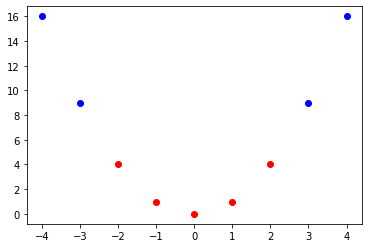

In [50]:
c_set = ['b', 'r']

for i in range(len(y)):
    plt.scatter(X_ploy[i,1],X_ploy[i,2], c=c_set[y[i]])

### 1.2.1 실습 - 비선형 데이터의 특성 확장 후 선형 SVM 분류

- 다음과 같은 비선형 데이터에 대해서 선형 SVM을 수행한다.

In [51]:
import sklearn.datasets as d

X, y = d.make_moons(n_samples=100, noise=0.15, random_state=42)

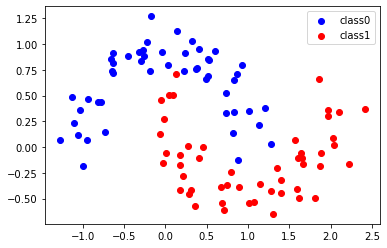

In [52]:
c_set = ['b', 'r']
l_set = ['class0', 'class1']

for t in set(y):
    X_pts = [X[i,0] for i in range(len(y)) if y[i] == t]
    y_pts = [X[i,1] for i in range(len(y)) if y[i] == t]

    plt.scatter(X_pts,y_pts, c=c_set[t], label=l_set[t])
    
plt.legend()
plt.show()

- 비선형 데이터를 그대로 이용하여 분류한 결과는 좋지 않다.

In [53]:
import sklearn.svm as svm

clf = svm.SVC(C=10, kernel='linear').fit(X,y)

- **clf.coef_, clf.intercept_** 를 활용하여 초평면 구하기
<img src="img/ch4_2.png" width="50%">

- 데이터의 특성을 다항식 형태로 변환한 뒤, 선형 SVM 분류를 수행한다.

In [54]:
import sklearn.preprocessing as pp

poly = pp.PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

In [55]:
import sklearn.svm as svm

clf = svm.SVC(C=10, kernel='linear').fit(X_poly,y)

- 다항식 형태로 변환된 데이터에 대해 선형 SVM 분류를 수행한 결과, 적절한 결정 경계가 나타난 것을 확인할 수 있다.
<img src="img/ch4_3.png" width="60%">

In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>